RGB (3-channels) ---> B/w 0-255 values for each channel

Plotting 3 histograms on top of each other(To see actual color channel)



In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
darkhouse_img_bgr = cv2.imread('Data/horse.jpg')
darkhouse_img = cv2.cvtColor(darkhouse_img_bgr, cv2.COLOR_BGR2RGB)

rainbow_img_bgr = cv2.imread('Data/rainbow.jpg')
rainbow_img = cv2.cvtColor(rainbow_img_bgr, cv2.COLOR_BGR2RGB)

bricks_img_bgr = cv2.imread('Data/bricks.jpg')
bricks_img = cv2.cvtColor(bricks_img_bgr, cv2.COLOR_BGR2RGB)


In [3]:
def display_img(img):
    fig = plt.figure(figsize=(12,9))
    ax=fig.add_subplot(111)
    ax.imshow(img)
    plt.axis('off')
    plt.show()
    plt.close()

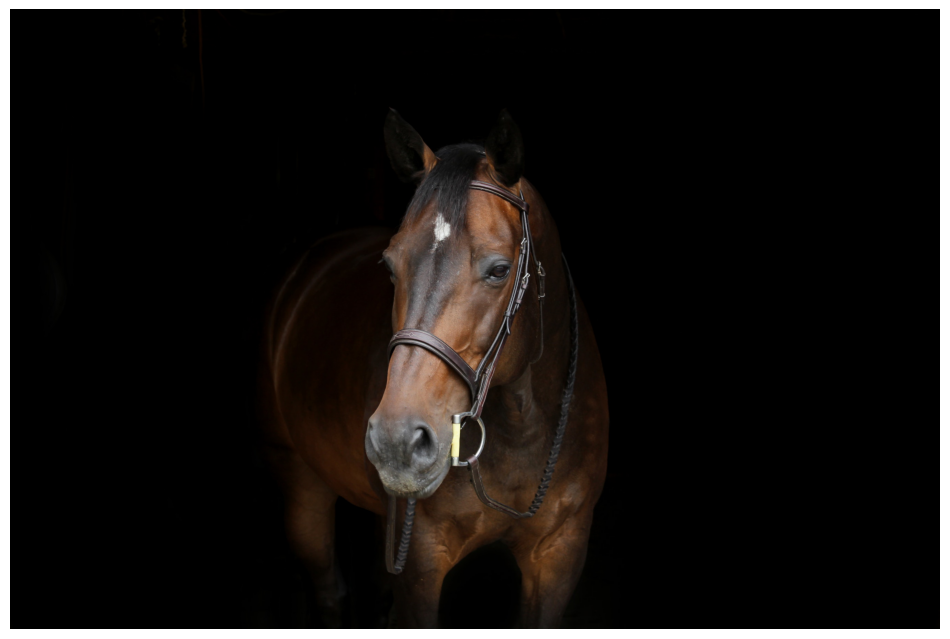

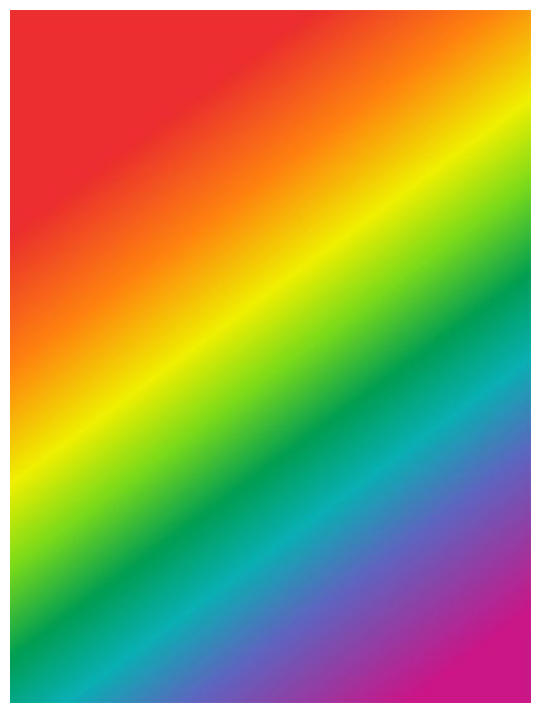

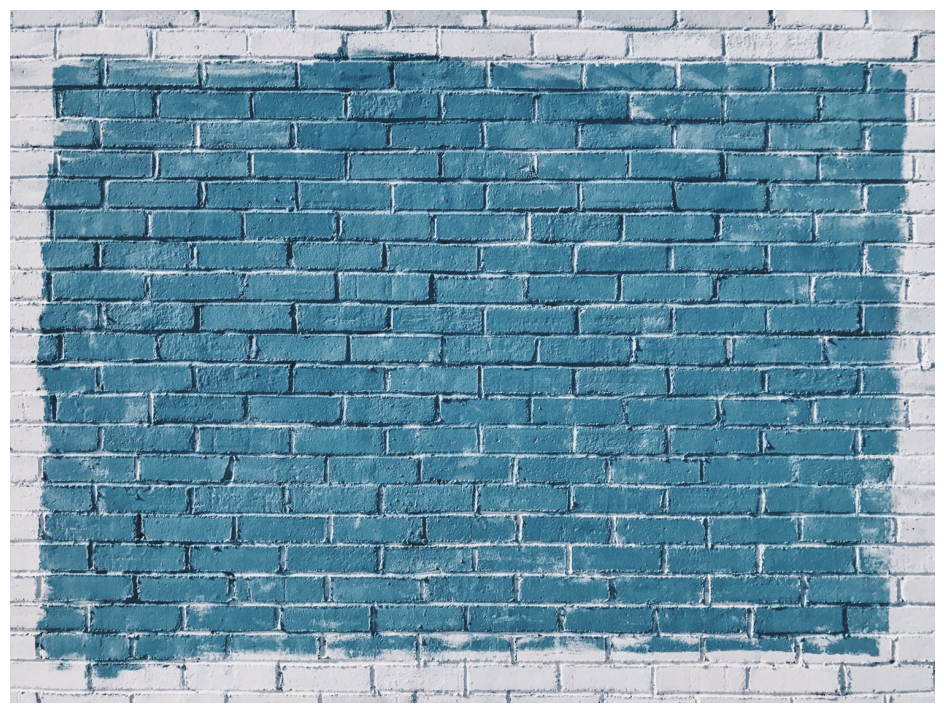

In [4]:
display_img(darkhouse_img)
display_img(rainbow_img)
display_img(bricks_img)

In [5]:
#histogram:(used bgr format)
#0 - blue, 1-green, 2-red
#mask - to calculate histogram for a part of image

hist_values = cv2.calcHist([bricks_img_bgr], channels=[0], mask=None, histSize=[256], ranges=[0,256])

print(hist_values.shape)


(256, 1)


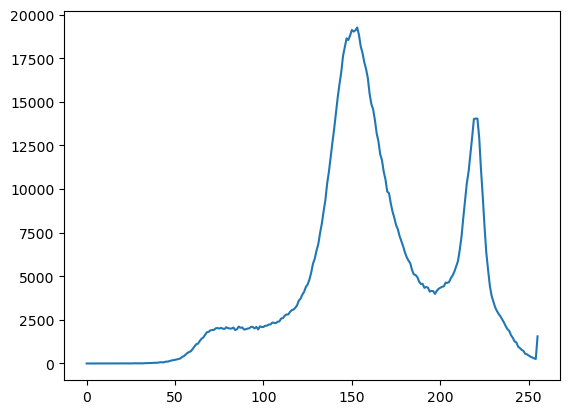

In [6]:
plt.plot(hist_values)
plt.show()

(256, 1)


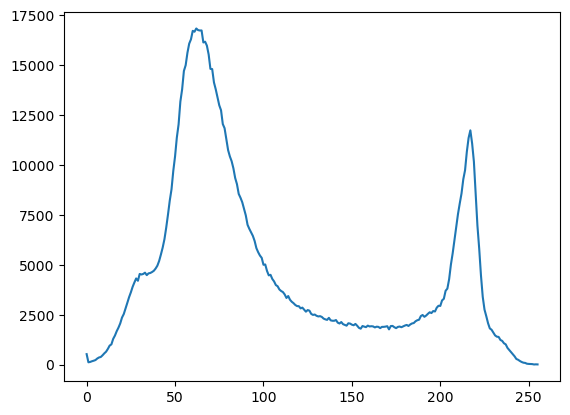

In [7]:
#can see high values of green present in image(130-230) approx
#the above is for bluechannel

#so for red -finding histogram for red channel.
hist_values = cv2.calcHist([bricks_img_bgr], channels=[2], mask=None, histSize=[256], ranges=[0,256])

print(hist_values.shape)
plt.plot(hist_values)
plt.show()

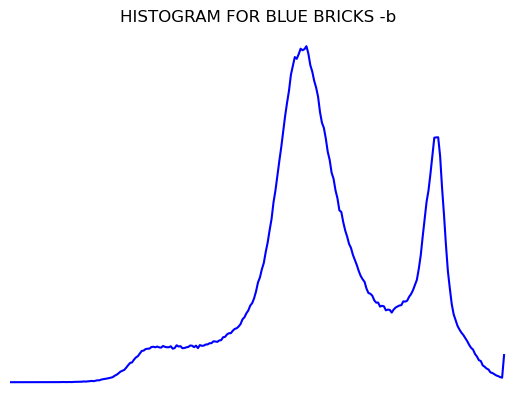

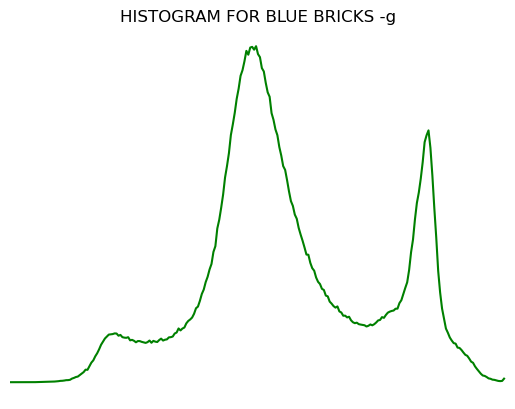

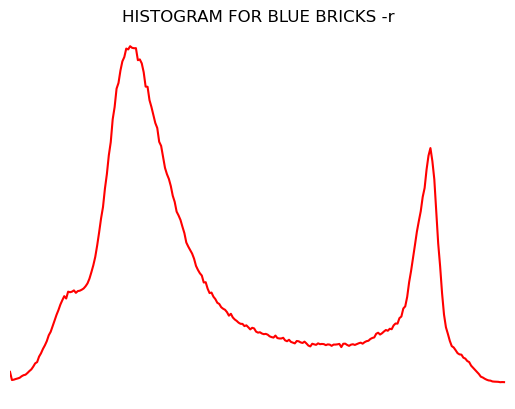

In [8]:


#now iterating it:

colors = ('b', 'g', 'r')

for i, clr in enumerate(colors):
    hist_val = cv2.calcHist([bricks_img_bgr], [i], None, [256], [0,256])
    plt.plot(hist_val, color=clr)
    plt.xlim([0,256])
    plt.title(f'HISTOGRAM FOR BLUE BRICKS -{clr}')
    plt.axis('off')
    plt.show()
    plt.close()
    

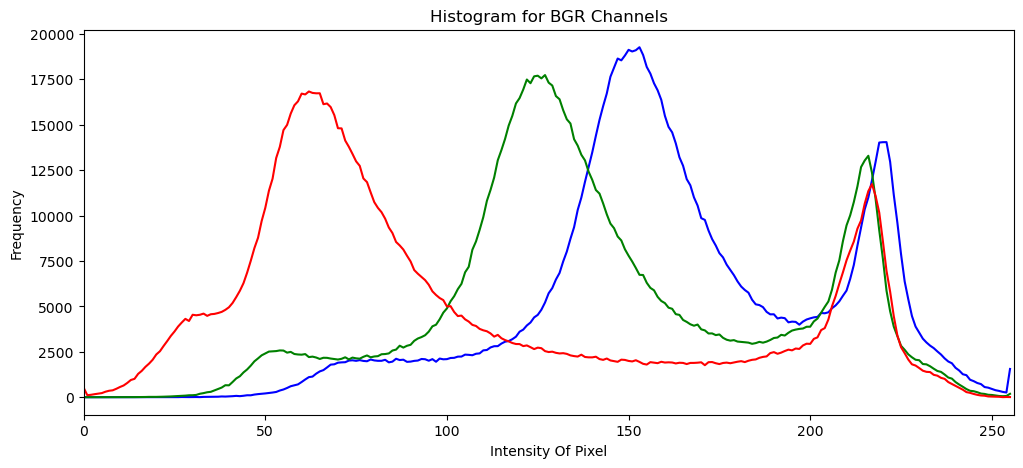

In [9]:
colors = ('b', 'g', 'r')  

plt.figure(figsize=(12, 5))

for i, clr in enumerate(colors):
    hist_val = cv2.calcHist([bricks_img_bgr], [i], None, [256], [0, 256])
    plt.plot(hist_val, color=clr)


plt.xlim([0, 256])
plt.xlabel('Intensity Of Pixel')
plt.ylabel('Frequency')
plt.title('Histogram for BGR Channels')
plt.show()

1. HISTOGRAM ON MASKED PORTION OF IMAGE.
2. HISTOGRAM EQUALIZATION

### 1. HISTOGRAM ON MASKED PORTION OF IMAGE:

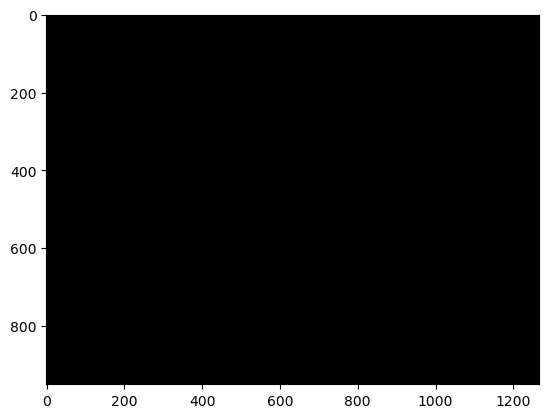

In [10]:
mask_b = np.zeros(bricks_img.shape[:2], np.uint8)
#so taking only x, y axis(no color channel) - 0's of image shape

#gives a black image
plt.imshow(mask_b, cmap='gray')
plt.show()

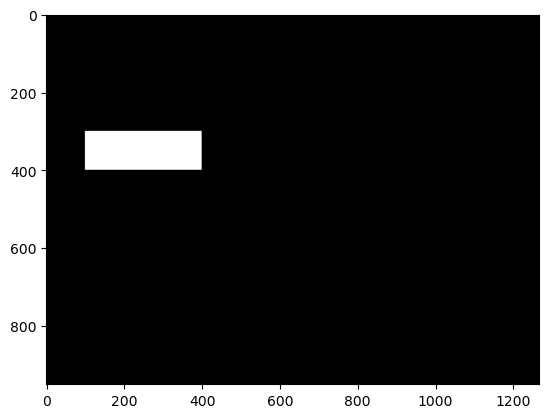

In [11]:
mask_b[300:400, 100:400]=255
#making this part white(by slicing)

plt.imshow(mask_b, cmap='gray')
plt.show()

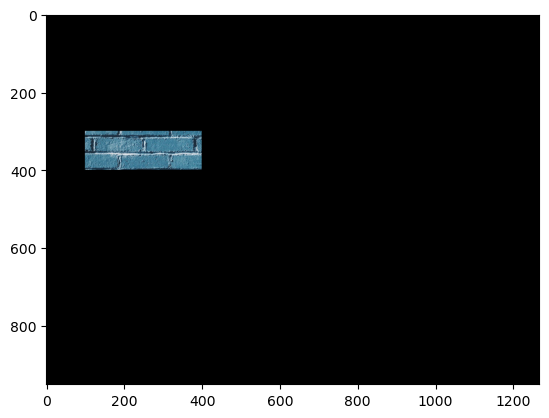

In [12]:
#now masking it back - as white part can show the colors beneath it

masked_img = cv2.bitwise_and(bricks_img, bricks_img, mask=mask_b) 

plt.imshow(masked_img)
plt.show()

In [13]:
masked_img = cv2.cvtColor(masked_img, cv2.COLOR_BGR2GRAY)
masked_img.shape
#mask should be in 2d

(950, 1267)

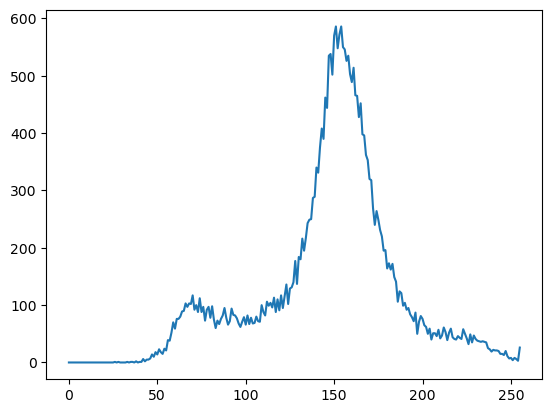

Text(0.5, 1.0, 'HISTOGRAM FOR MASKED PART OF BLUE BRICKS')

In [14]:
#histogram calculation for this masked region:

hist_mask_values_red = cv2.calcHist(images=[bricks_img], channels=[2], mask=masked_img, histSize=[256], ranges=[0,256])
plt.plot(hist_mask_values_red)
plt.show()
plt.xlim([0,256])
plt.title(f'HISTOGRAM FOR MASKED PART OF BLUE BRICKS')

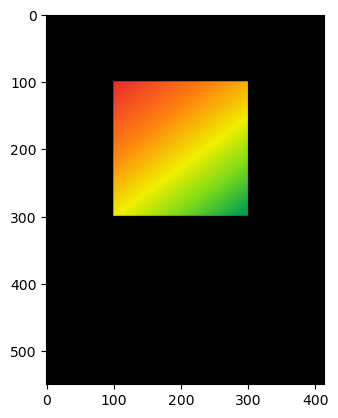

In [18]:
mask_r = np.zeros(rainbow_img.shape[:2], np.uint8)
#so taking only x, y axis(no color channel) - 0's of image shape
#gives a black image

mask_r[100:300, 100:300]=255
#making this part white(by slicing)


masked_img = cv2.bitwise_and(rainbow_img, rainbow_img, mask=mask_r) 

plt.imshow(masked_img)
plt.show()

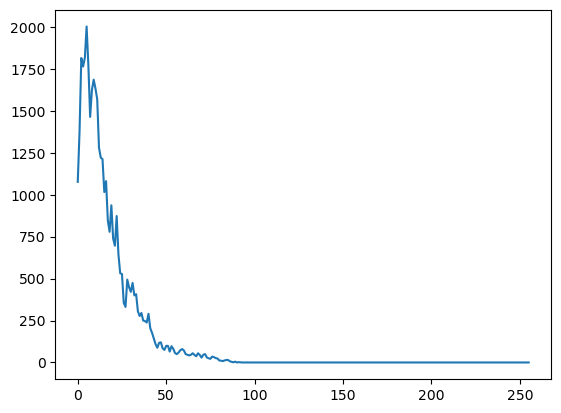

Text(0.5, 1.0, 'HISTOGRAM FOR MASKED PART OF Rainbow')

In [19]:
masked_img = cv2.cvtColor(masked_img, cv2.COLOR_BGR2GRAY)

hist_mask_values_red = cv2.calcHist(images=[rainbow_img], channels=[2], mask=masked_img, histSize=[256], ranges=[0,256])
plt.plot(hist_mask_values_red)
plt.show()
plt.xlim([0,256])
plt.title(f'HISTOGRAM FOR MASKED PART OF Rainbow')

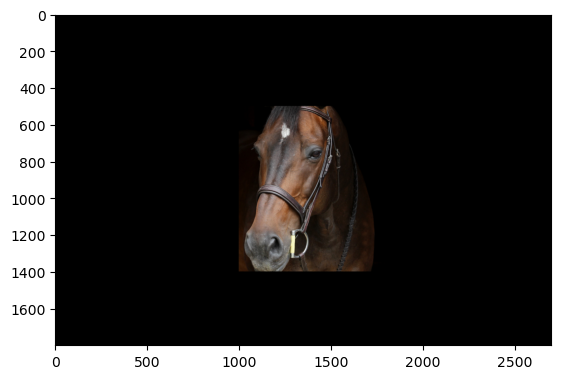

In [21]:
mask_h = np.zeros(darkhouse_img.shape[:2], np.uint8)
#so taking only x, y axis(no color channel) - 0's of image shape
#gives a black image

mask_h[500:1400, 1000:2000]=255
#making this part white(by slicing)


masked_img = cv2.bitwise_and(darkhouse_img, darkhouse_img, mask=mask_h) 

plt.imshow(masked_img)
plt.show()

In [22]:
masked_img.shape

(1800, 2700, 3)

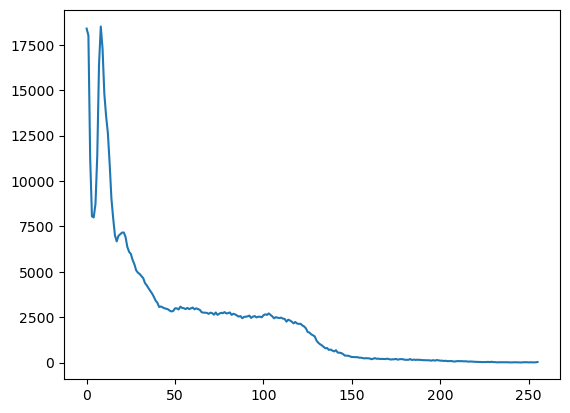

Text(0.5, 1.0, 'HISTOGRAM FOR MASKED PART OF Dark horse')

In [23]:
masked_img = cv2.cvtColor(masked_img, cv2.COLOR_BGR2GRAY)

hist_mask_values_red = cv2.calcHist(images=[darkhouse_img], channels=[2], mask=masked_img, histSize=[256], ranges=[0,256])
plt.plot(hist_mask_values_red)
plt.show()
plt.xlim([0,256])
plt.title(f'HISTOGRAM FOR MASKED PART OF Dark horse')

### 2. HISTOGRAM EQUALIZATION:

In [24]:
#To flatten or make image contrast - extremes (white or black replacement by mid range values)

gorilla_img_bgr = cv2.imread('Data/gorilla.jpg')
gorilla_img = cv2.cvtColor(gorilla_img_bgr, cv2.COLOR_BGR2RGB)

In [27]:
def display_img(img):
    fig = plt.figure(figsize=(12,9))
    ax=fig.add_subplot(111)
    ax.imshow(img)
    plt.axis('off')
    plt.show()
    plt.close()

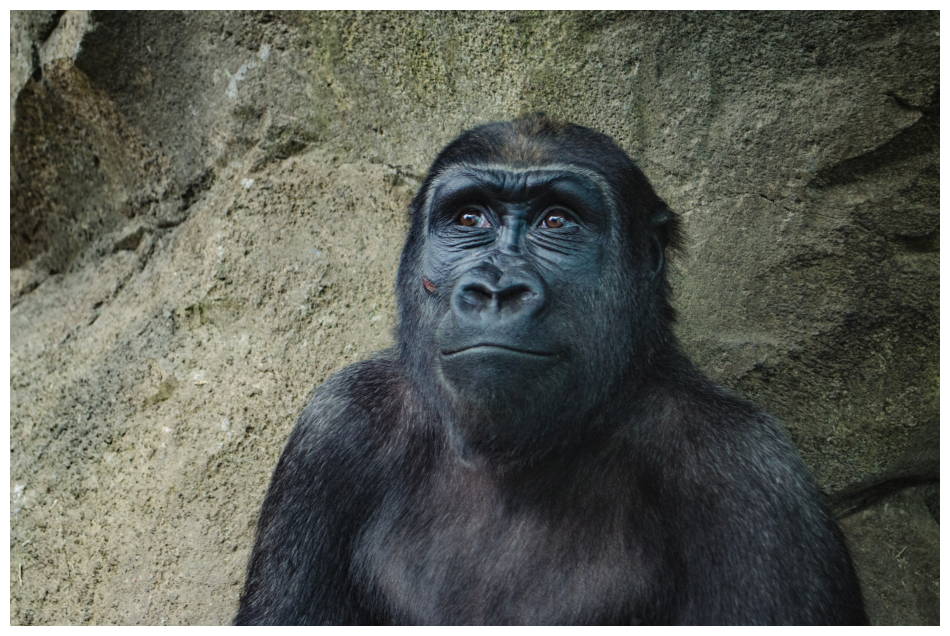

In [28]:
display_img(gorilla_img)

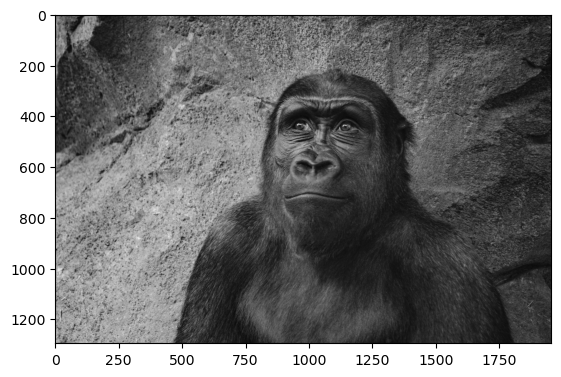

In [35]:
gorilla_img_gray = cv2.imread('Data/gorilla.jpg', 0)
plt.imshow(gorilla_img_gray, cmap='gray')
plt.show()


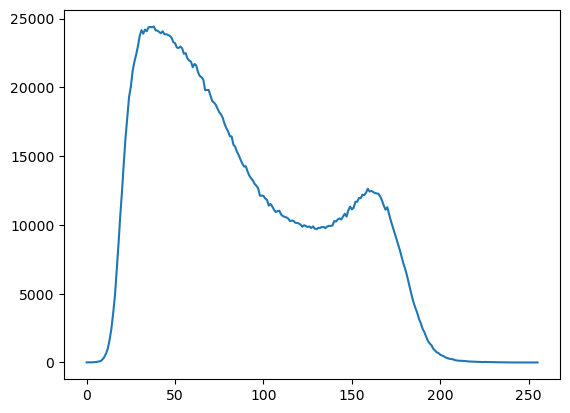

Text(0.5, 1.0, 'HISTOGRAM FOR GORILLA')

In [36]:
hist_eq_val = cv2.calcHist([gorilla_img_gray], channels=[0], mask=None, histSize=[256], ranges=[0,256])

plt.plot(hist_eq_val)
plt.show()
plt.xlim([0,256])
plt.title(f'HISTOGRAM FOR GORILLA')

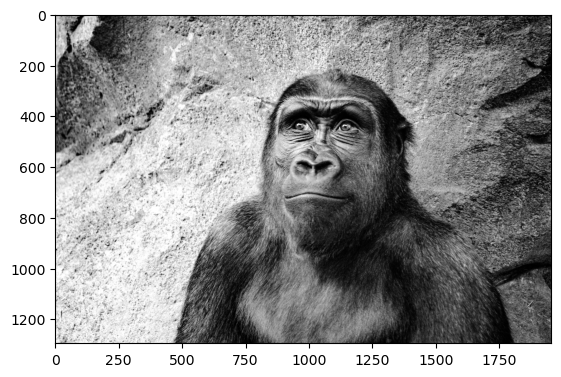

In [39]:
#now by equalizing it

eq_gorilla = cv2.equalizeHist(gorilla_img_gray)

plt.imshow(eq_gorilla, cmap='gray')
plt.show()

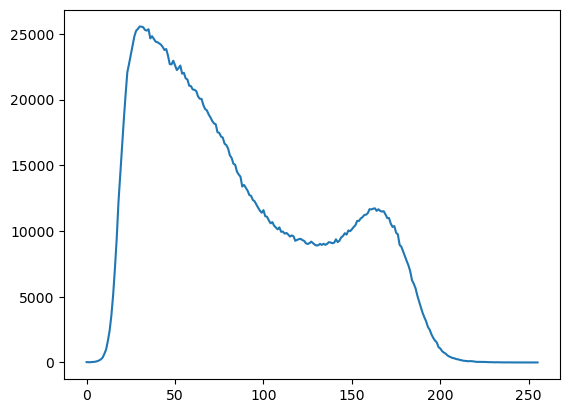

Text(0.5, 1.0, 'HISTOGRAM FOR GORILLA')

In [42]:
#can clearly see brightened version(contrasted)

#To do histogram equalization on color image:

hist_values = cv2.calcHist([gorilla_img], channels=[0], mask=None, histSize=[256], ranges=[0,256])

#can see more flattened
plt.plot(hist_values)
plt.show()
plt.xlim([0,256])
plt.title(f'HISTOGRAM FOR GORILLA')

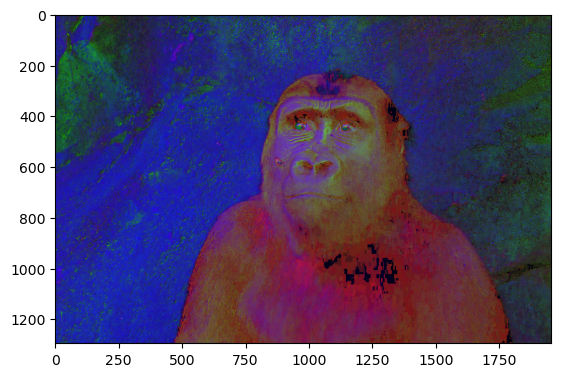

In [44]:
#need to convert to hsv to equalize:

gor_hsv = cv2.cvtColor(gorilla_img, cv2.COLOR_RGB2HSV)

plt.imshow(gor_hsv)
plt.show()

In [45]:
gor_hsv.shape

(1295, 1955, 3)

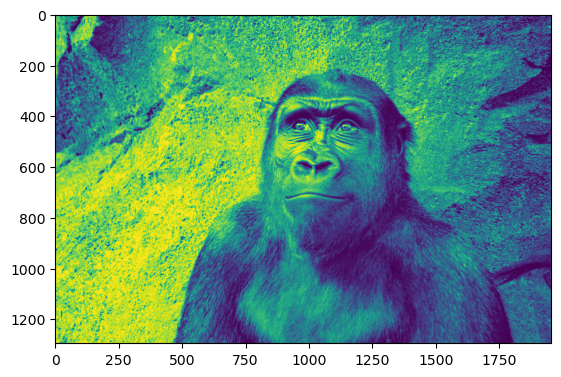

In [47]:
#2 index has values
#hsv[:,:,2] - has values


gor_hsv[:,:,2] = cv2.equalizeHist(gor_hsv[:,:,2])

plt.imshow(gor_hsv[:,:,2])
plt.show()

In [48]:
#now can see contrast image for colored original image.